# Importando as bibliotecas

In [20]:
import cv2
import mediapipe as mp
from keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from IPython.display import clear_output
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sn
import kagglehub

# Execução do modelo por webcam 

## Classes e pontuações

Adaptado de um [repositório](https://github.com/WellingtonDev25/leitor_libras) do GitHub.

In [ ]:
cap = cv2.VideoCapture(0)

hands = mp.solutions.hands.Hands(max_num_hands=1)

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
model = load_model('keras_model.h5', compile=False)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

try:
    while True:
        success, img = cap.read()
        frameRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        results = hands.process(frameRGB)
        handsPoints = results.multi_hand_landmarks
        h, w, _ = img.shape

        if handsPoints != None:
            hand = handsPoints[0]
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h

            for lm in hand.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y

            cv2.rectangle(img, (x_min-50, y_min-50), (x_max+50, y_max+50), (0, 255, 0), 2)

            try:
                imgCrop = img[y_min-50:y_max+50, x_min-50:x_max+50]
                imgCrop = cv2.resize(imgCrop, (224, 224))
                imgArray = np.asarray(imgCrop)
                normalized_image_array = (imgArray.astype(np.float32) / 127.0) - 1

                data[0] = normalized_image_array
                prediction = model.predict(data)
                sorted_positions = np.argsort(np.max(prediction, axis=0))
                best_score_pos = sorted_positions[-1]
                second_best_score_pos = sorted_positions[-2]
                third_best_score_pos = sorted_positions[-3]

                cv2.putText(img, f'Best class: {classes[best_score_pos]}', (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
                cv2.putText(img, f'Best confidence: {prediction[0][best_score_pos]:.2f}', (10, 60), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
                
                cv2.putText(img, f'2nd best class: {classes[second_best_score_pos]}', (10, 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
                cv2.putText(img, f'2nd best confidence: {prediction[0][second_best_score_pos]:.2f}', (10, 130), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
                
                cv2.putText(img, f'3rd best class: {classes[third_best_score_pos]}', (10, 170), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
                cv2.putText(img, f'3rd best confidence: {prediction[0][third_best_score_pos]:.2f}', (10, 200), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
            except:
                continue

        cv2.imshow('Teachable Machine - RNC - Libras', img)

        if cv2.waitKey(1) == 27: # ESC
            break
finally:
    cap.release()
    cv2.destroyAllWindows()

## Classe de melhor pontuação

In [ ]:
cap = cv2.VideoCapture(0)

hands = mp.solutions.hands.Hands(max_num_hands=1)

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']

model = load_model('keras_model.h5', compile=False)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

try:
    while True:
        success, img = cap.read()
        frameRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        results = hands.process(frameRGB)
        handsPoints = results.multi_hand_landmarks
        h, w, _ = img.shape

        if handsPoints != None:
            hand = handsPoints[0]
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h

            for lm in hand.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y

            cv2.rectangle(img, (x_min-50, y_min-50), (x_max+50, y_max+50), (0, 255, 0), 2)

            try:
                imgCrop = img[y_min-50:y_max+50, x_min-50:x_max+50]
                imgCrop = cv2.resize(imgCrop,(224,224))
                imgArray = np.asarray(imgCrop)
                normalized_image_array = (imgArray.astype(np.float32) / 127.0) - 1

                data[0] = normalized_image_array
                prediction = model.predict(data)
                best_score_pos = np.argmax(prediction)

                # Baseado em: https://gist.github.com/xcsrz/8938a5d4a47976c745407fe2788c813a
                text_size = cv2.getTextSize(classes[best_score_pos], cv2.FONT_HERSHEY_COMPLEX, 3, 5)[0]
                
                text_x = int((img.shape[1] - text_size[0]) / 2)
                text_y = int(img.shape[0] - (text_size[0] / 2))

                cv2.putText(img, classes[best_score_pos], (text_x, text_y), cv2.FONT_HERSHEY_COMPLEX, 3, (0, 0, 255), 5)
            except:
                continue

        cv2.imshow('Teachable Machine - RNC - Libras', img)
        if cv2.waitKey(1) == 27: # ESC
            break
finally:
    cap.release()
    cv2.destroyAllWindows()

# Testes com métricas de desempenho em um [conjunto de dados](https://www.kaggle.com/datasets/allanpardinho/libras-cnn)

In [ ]:
path = kagglehub.dataset_download("allanpardinho/libras-cnn")

print("Caminho para o dataset:", path)

dataset_path = path + '/test/'

## Visualização do conjunto de dados

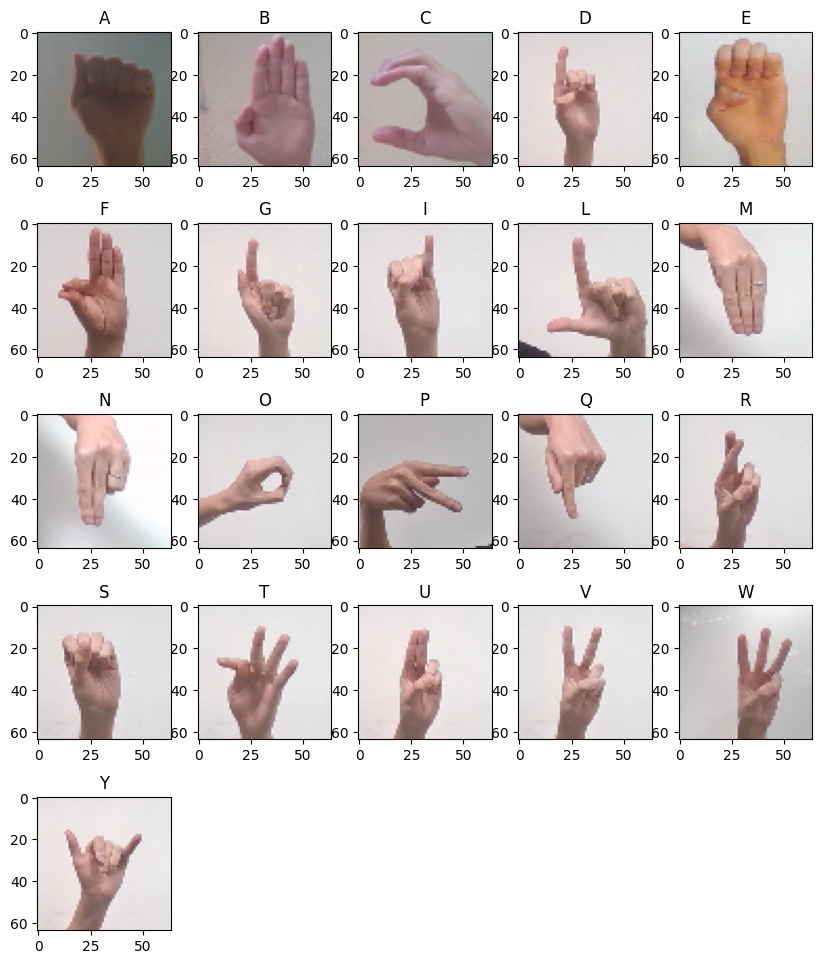

In [24]:
folders = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
images = []

plt.figure(figsize = (10, 12))

for key, folder in enumerate(folders):
    file_path = f'{dataset_path + folder}/1.png'

    image = mpimg.imread(file_path)

    plt.subplot(5, 5, key + 1)
    plt.title(folder)
    plt.imshow(image)

## Execução do modelo sobre o conjunto de dados

In [25]:
model = load_model("keras_model.h5", compile=False)

folders = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']

label_to_id = { 'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'I': 7, 'L': 8, 'M': 9, 'N': 10, 
                'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'U': 17, 'V': 18, 'W': 19, 'Y': 20}

y_pred = np.ndarray(shape=(0))
y_true = np.ndarray(shape=(0))

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

number_of_images = 300

for folder in folders:
    for x in range(1, number_of_images+1):
        file_path = f'{dataset_path + folder}/{x}.png'

        img = mpimg.imread(file_path)
        imgCrop = cv2.resize(img, (224, 224))
        imgArray = np.asarray(imgCrop)
        normalized_image_array = (imgArray.astype(np.float32) / 127.5) - 1
        data[0] = normalized_image_array
        
        prediction = model.predict(data)
        index = np.argmax(prediction)
        
        y_pred = np.append(y_pred, index)
        y_true = np.append(y_true, label_to_id[folder])

        if x % 30 == 0:
            clear_output(wait=True)
            print(f'{dataset_path}{folder} : {x}')

C:\Users\guilh\.cache\kagglehub\datasets\allanpardinho\libras-cnn\versions\1/test/Y : 300


In [26]:
y_pred.shape, y_true.shape

((6300,), (6300,))

## Geração e visualização das métricas

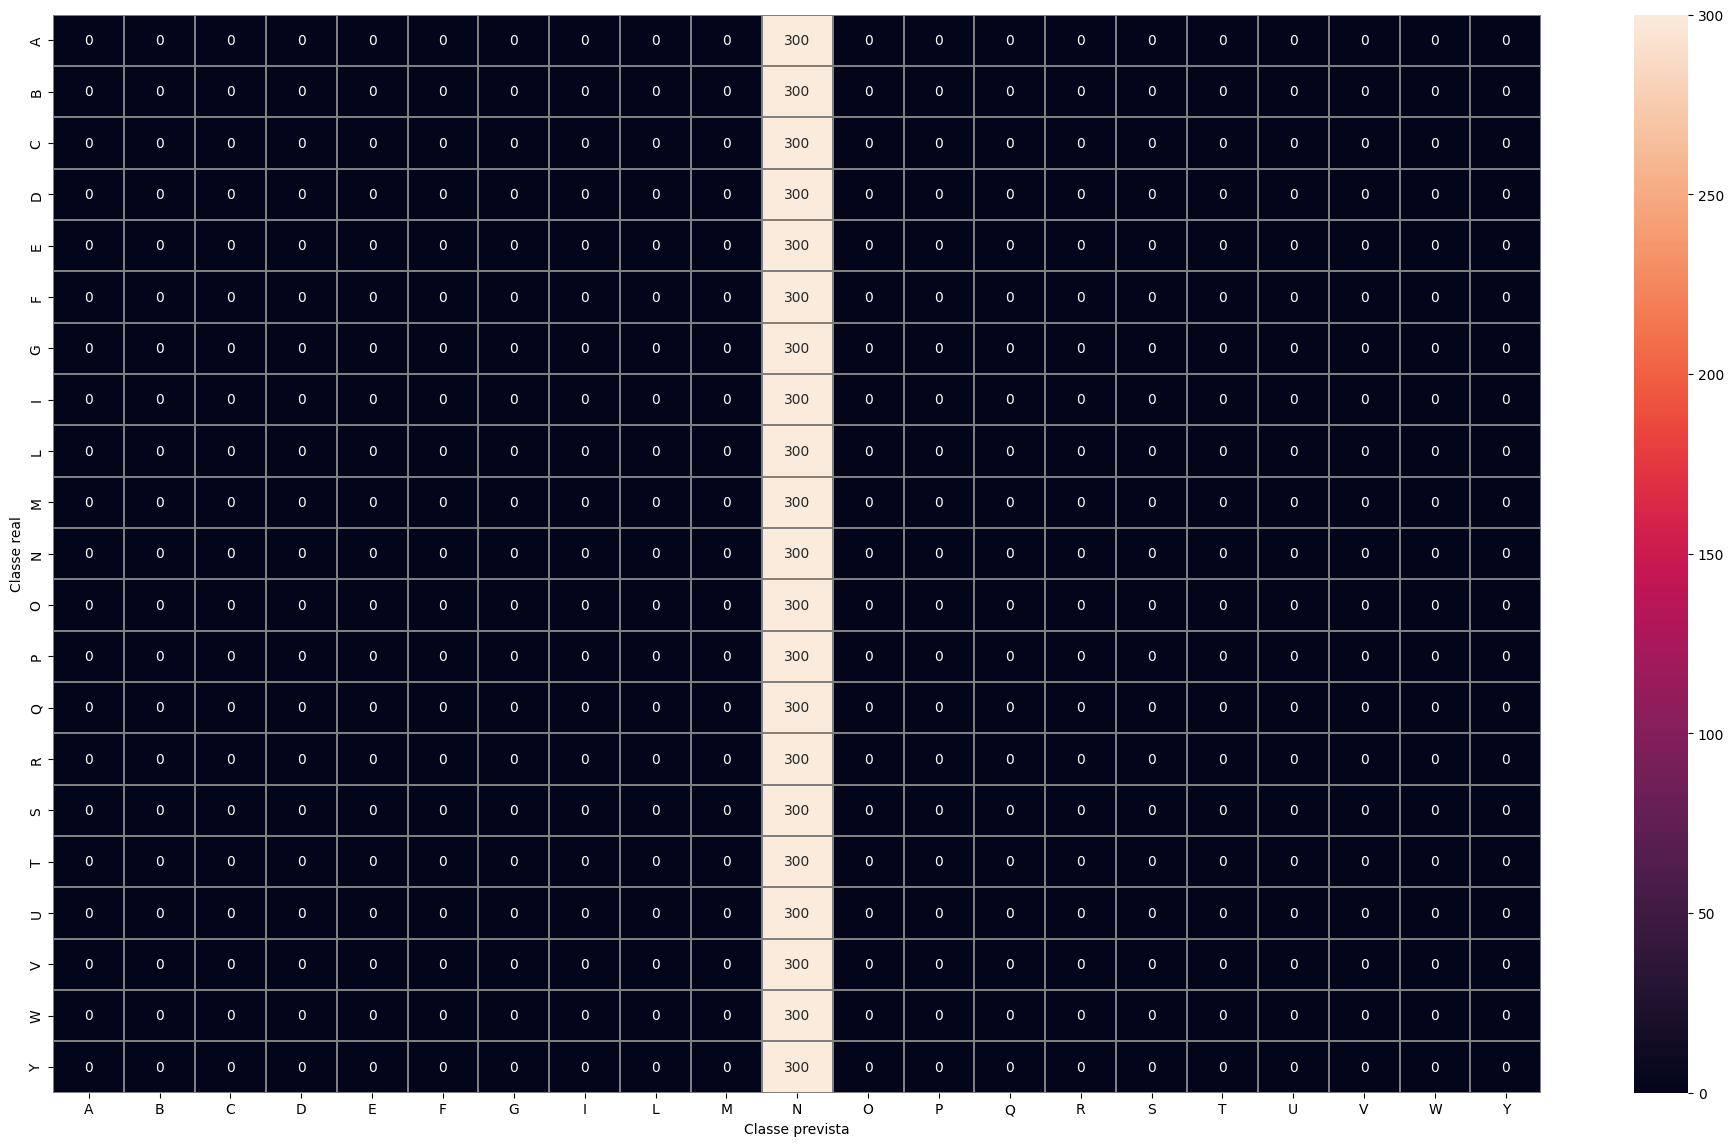

Acurácia: 0.047619047619047616


In [27]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']

cf_matrix = confusion_matrix(y_true, y_pred, labels=[i for i in range(0, len(classes))])

df_cm = pd.DataFrame(cf_matrix, index=[i for i in classes], columns=[i for i in classes])

plt.figure(figsize = (24, 14))

sn.heatmap(df_cm, linewidths=.1, linecolor='gray', annot=True, fmt='d')

plt.xlabel('Classe prevista')
plt.ylabel('Classe real')

#plt.savefig('confusion_matrix.png')
plt.show()

accuracy = accuracy_score(y_true, y_pred)

print(f'Acurácia: {accuracy}')

In [28]:
model = load_model("keras_model.h5", compile=False)

folders = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']

label_to_id = { 'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'I': 7, 'L': 8, 'M': 9, 'N': 10, 
                'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'U': 17, 'V': 18, 'W': 19, 'Y': 20}

images = np.ndarray(shape=(0, 224, 224, 3), dtype=np.float32)

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

number_of_images = 300

for folder in folders:
    aux_images = np.ndarray(shape=(0, 224, 224, 3), dtype=np.float32)
    
    for x in range(1, number_of_images+1):
        file_path = f'{dataset_path + folder}/{x}.png'

        img = mpimg.imread(file_path)
        imgCrop = cv2.resize(img, (224, 224))
        imgArray = np.asarray(imgCrop)
        normalized_image_array = (imgArray.astype(np.float32) / 127.5) - 1
        data[0] = normalized_image_array
        
        aux_images = np.concatenate((aux_images, data), axis=0)

        if x % 30 == 0:
            clear_output(wait=True)
            print(f'{folder} | {x}')

    images = np.concatenate((images, aux_images), axis=0)


Y | 300


In [29]:
images.shape, y_true.shape

((6300, 224, 224, 3), (6300,))

In [30]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='acc')

In [31]:
model.evaluate(x=images, y=y_true)

197/197 [==============================] - 24s 119ms/step - loss: 5.5324 - acc: 0.0476


[5.532400608062744, 0.0476190485060215]